# Linear Algebra (CpE210A)
## Laboratory 2: Plotting Vectors using NumPy and MatPlotLib
##### Coded and submitted by:
##### Samson, Martin Clarence Ty
##### 58010

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

%matplotlib inline

## START OF FUNCTION
def track_eagle(make_figs=True):
    long = np.random.randint(-10,10, size=3) ## since we don't actually have eagle tracking data we will use
    lat = np.random.randint(-10,10, size=3)  ## random integers for this activity. These two lines will produce
                                             ## a vector with shape of (3,) describing the distances for the 
                                             ## eagle's flight.

    dist1 = np.array([long[0], lat[0]])                
    dist2 = np.array([long[1], lat[1]])
    dist3 = np.array([long[2], lat[2]])
    dist_total = np.array([long.sum(), lat.sum()])     
    disp = np.sqrt(np.power(dist_total[0],2) + np.power(dist_total[1],2))                             
    alpha = 10**-6
    theta =  np.arctan(dist_total[1]/(alpha+dist_total[0]))                            
    theta = np.degrees(theta)
    
    ## Plotting the PH Eagle flight vectors.
    plt.figure(figsize=(10,10))
    plt.title('Philippine Eagle Flight Plotter')
    plt.xlim(-30, 30)
    plt.ylim(-30, 30)
    plt.xlabel('Latitudinal Distance')
    plt.ylabel('Longitudinal Distance')
    plt.grid()
    n = 2
    
    ### Self-discovery code block (Refer to guide question 2 for the task)
    
    plt.quiver(0,0, dist1[0], dist1[1], 
               angles='xy', scale_units='xy',scale=1, color='red', 
               label='Trajectory 1: {:.2f}m.'.format(np.linalg.norm(dist1)))
    plt.quiver(dist1[0], dist1[1], dist2[0], dist2[1], 
               angles='xy', scale_units='xy',scale=1, color='blue',
              label='Trajectory 2: {:.2f}m.'.format(np.linalg.norm(dist2)))
    plt.quiver(np.add(dist1[0],dist2[0]), np.add(dist1[1],dist2[1]),
               dist3[0], dist3[1], angles='xy', scale_units='xy',scale=1, color='green',
              label='Trajectory 3: {:.2f}m.'.format(np.linalg.norm(dist3)))
    plt.quiver(0,0, dist_total[0], dist_total[1], 
               angles='xy', scale_units='xy',scale=1, color='orange',
              label='Displacement: {:.2f}m. @ {:.2f}'.format(disp, theta))
    
    plt.legend()
    
    if make_figs:
        plt.savefig(f'LinAlg-Lab2-PH Eagle-{int(disp)}@{int(theta)}.png', dpi=300)
    
    plt.show()
    
## END OF FUNCTION  
   

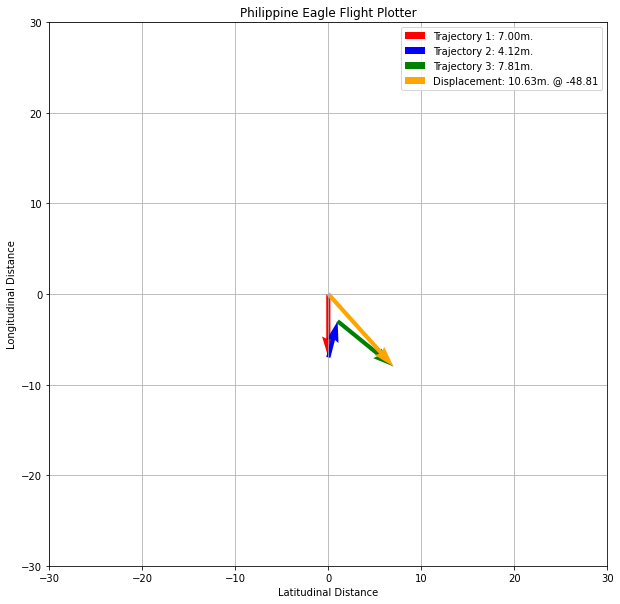

In [2]:
track_eagle(make_figs=True)

In [3]:
def eagle_kinematics(speed, time):
    required_shape = 4
    velocity = np.zeros((required_shape-1,))
    acceleration = np.zeros((required_shape-2,))
    time_vector = np.array([time**3, time**2, time, 1])
    if speed.shape == (required_shape,):
        velocity = np.array([3*speed[0],2*speed[1], speed[2]])
        acceleration = np.array([2*velocity[0],velocity[1]])
        speed_time = np.sum(np.multiply(speed, time_vector))
        velocity_time = np.sum(np.multiply(velocity, time_vector[1:]))
        acceleration_time = np.sum(np.multiply(acceleration, time_vector[2:]))
        
    else:
        print(f'Input displacement vector is not valid. Make sure that the vector shape is ({req_shape},)')
    
    return speed_time, velocity_time, acceleration_time

In [4]:
x = np.array([2,1,3,2])
t = 2
eagle_kinematics(x, t)

(28, 31, 26)

In [5]:

## START OF FUNCTION
def month_profit_trace(profit, reach, make_figs=True): ## You can simplify/ optimize this code for extra points
    if (profit.shape == (4,)) and (reach.shape == (4,)): 
        week1 = np.array((reach[0], profit[0]))       
        week2 = np.array((reach[1], profit[1]))
        week3 = np.array((reach[2], profit[2]))
        week4 = np.array((reach[3], profit[3]))
        
        week_total = np.array([reach.sum(), profit.sum()])
        week_performance = np.sqrt(np.power(week_total[0],2) + np.power(week_total[1],2))
        alpha = 10**-6
        theta = np.arctan(week_total[1]/(alpha+week_total[0]))
        reach_gradient = np.degrees(theta)
        

        plt.figure(figsize=(16,5))
        plt.title('Bebang\'s Month Post Efficiency')
        plt.xlim(0,1.01*np.sum(reach))
        plt.ylim(-np.sum(np.abs(profit)),np.sum(np.abs(profit)))
        plt.xlabel('FB Post Reach Increment')
        plt.ylabel('Profit')
        plt.grid()
        n = 2
        
        plt.quiver(0,0, week1[0], week1[1], 
               angles='xy', scale_units='xy',scale=1, color='red', width=0.0025,
               label='Week 1: {:.2f}m.'.format(np.linalg.norm(week1)))
        plt.quiver(week1[0], week1[1], week2[0], week2[1], 
               angles='xy', scale_units='xy',scale=1, color='blue', width=0.0025,
              label='Week 2: {:.2f}m.'.format(np.linalg.norm(week2)))
        plt.quiver(np.add(week1[0],week2[0]), np.add(week1[1],week2[1]),
               week3[0], week3[1], angles='xy', scale_units='xy',scale=1, color='green', width=0.0025,
              label='Week 3: {:.2f}m.'.format(np.linalg.norm(week3)))
        plt.quiver(np.add(np.add(week1[0],week2[0]),week3[0]), np.add(np.add(week1[1],week2[1]),week3[1]),
               week4[0], week4[1], angles='xy', scale_units='xy',scale=1, color='black', width=0.0025,
              label='Week 4: {:.2f}m.'.format(np.linalg.norm(week4)))
        plt.quiver(0,0, week_total[0], week_total[1], 
               angles='xy', scale_units='xy',scale=1, color='orange', width=0.0025,
              label='Efficiency: {:.2f}m. @ {:.2f}'.format(week_performance, theta))

        plt.legend(loc='upper left')

        if make_figs:
            plt.savefig(f'LinAlg-Lab2-Bebang Post Eff-{int(week_performance)}@{int(reach_gradient)}.png', dpi=300)

        plt.show()
    
    else:
        print('Invalid data') ## Make a more appropriate error statement. 

## END OF FUNCTION  


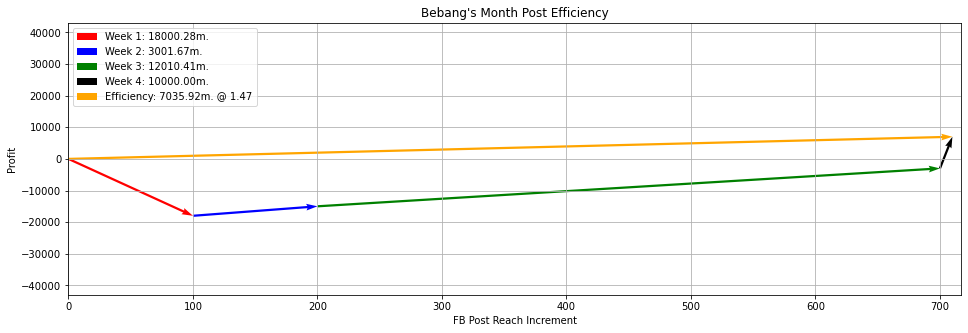

In [6]:
profit= np.array([-18000, 3000, 12000, 10000])    ## You can change the values to make different scenarios
reach = np.array([100, 100, 500, 10])   
month_profit_trace(profit, reach, make_figs=True)